### Create a .py file by name _0008_5_LinkedListInterview and it has the following code . We imported it

from random import randint

class Node:
    def __init__(self,value):
        self.value = value
        self.next = None
        self.prev = None

    def __str__(self):
        return str(self.value)
    
    
class LinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        
    def __iter__(self):
        temp = self.head
        while temp:
            yield temp.value
            temp = temp.next
            
    def __str__(self):
        values = [str(i) for i in self]
        return "-->".join(values)
    
    def __len__(self):
        values = [str(i) for i in self]
        return len(values)
        
        
    def insert_end(self,value):
        if self.head == None:
            newNode = Node(value)
            self.head = newNode
            self.tail = newNode
        else:
            self.tail.next = Node(value)
            self.tail = self.tail.next 
            
    def generate(self,n,min_value,max_value):
        self.head = None
        self.tail = None
        for i in range(n):
            self.insert_end(randint(min_value,max_value))
        return
        
        

In [78]:
from _0008_5_LinkedListInterview import LinkedList
LL = LinkedList()
LL.generate(10,0,99)
print(LL)

52-->69-->8-->66-->39-->24-->95-->54-->66-->72


# Question 1 : Remove Duplicates from Linked List
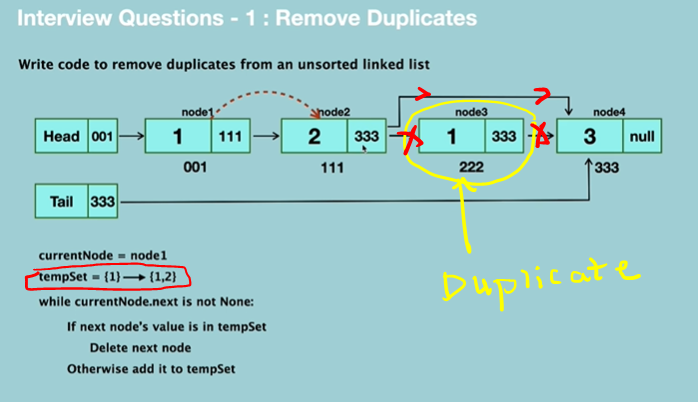

### Removing Duplicates by using buffer  (visited)
### Time Complexity : $O(n)$
### Space Complexity : $O(n)$ , because of buffer

In [94]:
def Remove_Duplicte_with_buffer(L):
    if L.head == None:
        return "Empty LL"
    else:
        temp = L.head
        visited = set([temp.value])
        while temp.next:
            if temp.next.value in visited:
                temp.next = temp.next.next
            else:
                visited.add(temp.next.value)
                temp = temp.next
        return L

In [95]:
from _0008_5_LinkedListInterview import LinkedList
L = LinkedList()
L.generate(10,0,99)
print(L)
print(Remove_Duplicte_with_buffer(L))

95-->95-->21-->54-->12-->54-->61-->49-->32-->29
95-->21-->54-->12-->61-->49-->32-->29


### Removing Duplicates without using buffer  (visited)
### Time Complexity : $O(n^2)$
### Space Complexity : $O(1)$ , because of No buffer

In [13]:
def Remove_Duplicte_without_buffer(L):
    if L.head == None:
        return "Empty LL"
    else:
        temp = L.head
        while temp:
            runner = temp
            while runner.next:
                if temp.value == runner.next.value:
                    runner.next = runner.next.next
                else:
                    runner = runner.next
                    
            temp = temp.next
        return L.head

In [17]:
from _0008_5_LinkedListInterview import LinkedList
L = LinkedList()
L.generate(10,0,99)
print(L)
Remove_Duplicte_without_buffer(L)
print(L)

90-->81-->97-->72-->17-->94-->97-->57-->75-->68
90-->81-->97-->72-->17-->94-->57-->75-->68


# Question 2 : Return Nth to Last
### Time Complexity : $O(n)$
### Space Complexity : $O(1)$ 
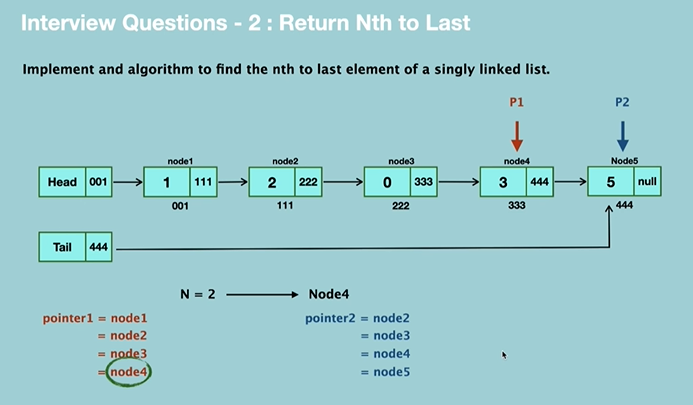

In [18]:
def nthToLast(L,n):
    p1 = L.head
    p2 = L.head
    for i in range(n):
        if p2 == None:
            return None
        else:
            p2 = p2.next
    while p2:
        p1 = p1.next
        p2 = p2.next
    return p1

In [20]:
from _0008_5_LinkedListInterview import LinkedList
L = LinkedList()
L.generate(10,0,99)
print(L)
print(nthToLast(L,4))

78-->51-->87-->89-->17-->56-->61-->74-->44-->15
61


# Question 3 Partition
### Time Complexity : $O(n)$
### Space Complexity : $O(1)$ 
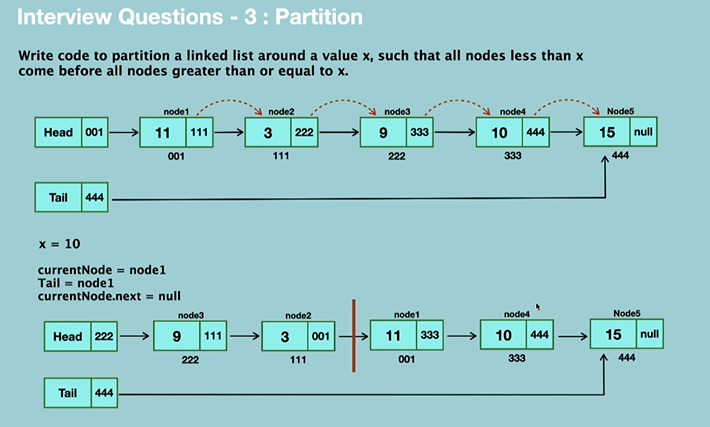

In [7]:
def partition(L,x):
    temp = L.head
    L.tail = L.head
    while temp:
        nextNode = temp.next
        temp.next = None
        if temp.value < x:
            temp.next = L.head
            L.head = temp
        else:
            L.tail.next = temp
            L.tail = temp
        temp = nextNode
        
    if L.tail.next is not None:
        L.tail.next = None
            
            

In [8]:
from _0008_5_LinkedListInterview import LinkedList
L = LinkedList()
L.generate(10,0,99)
print(L)
partition(L,20)
print(L)

42-->64-->58-->81-->41-->94-->91-->16-->18-->97
18-->16-->42-->64-->58-->81-->41-->94-->91-->97


# Question 4 Sum Linked Lists
### Time Complexity : $O(n)$
### Space Complexity : $O(n)$ 
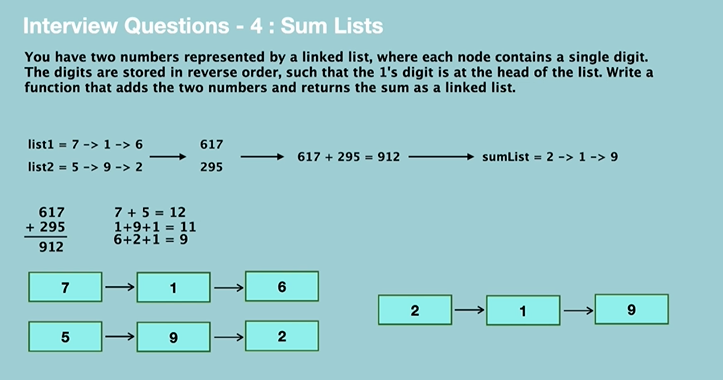

In [19]:
def sumList(llA, llB):
    n1 = llA.head
    n2 = llB.head
    carry = 0
    ll = LinkedList()

    while n1 or n2:
        result = carry
        if n1:
            result += n1.value
            n1 = n1.next
        if n2:
            result += n2.value
            n2 = n2.next
        ll.insert_end(int(result % 10))
        carry = result // 10
    
    return ll
    

In [14]:
from _0008_5_LinkedListInterview import LinkedList
L1 = LinkedList()
L1.generate(3,0,9)
print("L1 :",L1)
L2 = LinkedList()
L2.generate(3,0,9)
print("L2 :",L2)

L1 : 9-->5-->6
L2 : 3-->8-->9


In [20]:
print(sumList(L1,L2))

2-->4-->6


# Question 5 : Intersection
### Time Complexity : $O(A+B)$
### Space Complexity : $O(1)$ 
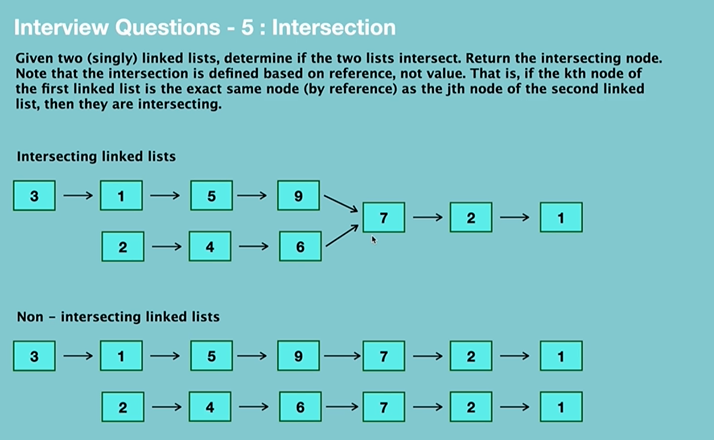

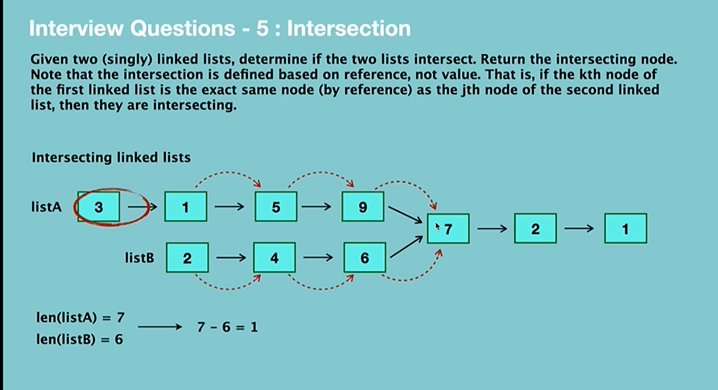

In [22]:


def intersection(llA, llB):
    if llA.tail is not llB.tail:
        return False
    
    lenA = len(llA)
    lenB = len(llB)

    shorter = llA if lenA < lenB else llB
    longer = llB if lenA < lenB else llA

    diff = len(longer) - len(shorter)
    longerNode = longer.head
    shorterNode = shorter.head

    for i in range(diff):
        longerNode = longerNode.next
    
    while shorterNode is not longerNode:
        shorterNode = shorterNode.next
        longerNode = longerNode.next
    
    return longerNode




In [23]:
# Helper addition method
def addSameNode(llA, llB, value):
    tempNode = Node(value)
    llA.tail.next = tempNode
    llA.tail = tempNode
    llB.tail.next = tempNode
    llB.tail = tempNode



In [24]:
from _0008_5_LinkedListInterview import LinkedList,Node
llA = LinkedList()
llA.generate(3,0, 10)

llB = LinkedList()
llB.generate(4,0, 10)

addSameNode(llA, llB, 11)
addSameNode(llA, llB, 14)

print(llA)
print(llB)

print(intersection(llA, llB))

0-->8-->0-->11-->14
6-->7-->2-->1-->11-->14
11
